<a href="https://colab.research.google.com/github/SteveChengChen/data-analysis/blob/main/STAT_5241_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

communities_and_crime.metadata.target_col

['ViolentCrimesPerPop']

In [3]:
# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets["ViolentCrimesPerPop"]

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)

{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'ID': 405, 'type': 'NATIVE', 'title': 'A data-driven software tool for enabling cooperative information s

In [6]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)
X.head()

shape of X: (1994, 127)
shape of y: (1994,)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


In [8]:
import numpy as np

# Data Cleaning
X = X.replace('?', np.nan)

In [9]:
id_cols = ["state", "county", "community", "communityname", "fold"]

# Drop ID Columns
X.drop(columns=id_cols, errors='ignore', inplace=True)

print("Shape after dropping ID columns:", X.shape)

Shape after dropping ID columns: (1994, 122)


In [10]:
# Drop Columns Missing > 50% of Values
n = len(X)
threshold = 0.5

cols_to_drop = [col for col in X.columns if X[col].isna().sum()/n > threshold]
print("Columns with >50% missing:\n", cols_to_drop)

X.drop(columns=cols_to_drop, inplace=True)

print("Shape after dropping high-missing columns:", X.shape)

Columns with >50% missing:
 ['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
Shape after dropping high-missing columns: (1994, 100)


In [11]:
# Drop Rows with Missing Values
X.dropna(axis=0, inplace=True)

y = y.loc[X.index]

print("Final shape of X:", X.shape)
print("Final shape of y:", y.shape)

Final shape of X: (1993, 100)
Final shape of y: (1993,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (1594, 100)
X_test shape: (399, 100)


In [22]:
# OLS

import statsmodels.api as sm

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_train_const = sm.add_constant(X_train_scaled_df)

ols_model = sm.OLS(y_train, X_train_const).fit()

print(ols_model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.704
Model:                             OLS   Adj. R-squared:                  0.684
Method:                  Least Squares   F-statistic:                     35.53
Date:                 Sun, 23 Feb 2025   Prob (F-statistic):          4.94e-324
Time:                         00:46:13   Log-Likelihood:                 1026.8
No. Observations:                 1594   AIC:                            -1852.
Df Residuals:                     1493   BIC:                            -1309.
Df Model:                          100                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [23]:
pvals_sorted = ols_model.pvalues.sort_values()
pvals_features_only = pvals_sorted.drop("const", errors="ignore")
top_10_pvals = pvals_features_only.head(10)

print("\nTop 10 features by lowest p-value (OLS):")
print(top_10_pvals)


Top 10 features by lowest p-value (OLS):
racepctblack          0.000339
PctPersDenseHous      0.000372
MalePctNevMarr        0.000980
PctWorkMom            0.001607
PctPopUnderPov        0.001694
NumStreet             0.002006
PersPerRentOccHous    0.002079
PctVacMore6Mos        0.004308
PctEmploy             0.005009
whitePerCap           0.007098
dtype: float64


In [37]:
# Best Subsets

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X_train_numeric = X_train.select_dtypes(include=[np.number])

correlations = []
for col in X_train_numeric.columns:
    corr_val = X_train_numeric[col].corr(y_train)
    correlations.append((col, corr_val))

corr_df = pd.DataFrame(correlations, columns=["feature", "correlation"])
corr_df["abs_corr"] = corr_df["correlation"].abs()
corr_df.sort_values("abs_corr", ascending=False, inplace=True)
print(corr_df.head(10))

             feature  correlation  abs_corr
43       PctKids2Par    -0.743700  0.743700
49          PctIlleg     0.737619  0.737619
42        PctFam2Par    -0.715147  0.715147
3       racePctWhite    -0.691366  0.691366
44  PctYoungKids2Par    -0.673894  0.673894
45       PctTeen2Par    -0.670809  0.670809
2       racepctblack     0.639235  0.639235
15        pctWInvInc    -0.572874  0.572874
17       pctWPubAsst     0.570246  0.570246
39      FemalePctDiv     0.561005  0.561005


In [39]:
top_n = 30
top_features = corr_df.head(top_n)["feature"].tolist()

X_train_filt = X_train_numeric[top_features]
X_test_filt = X_test[top_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_filt_scaled = scaler.fit_transform(X_train_filt)
X_test_filt_scaled = scaler.transform(X_test_filt)

lr = LinearRegression()

efs = ExhaustiveFeatureSelector(
    estimator=lr,
    min_features=1,
    max_features=5,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

efs.fit(X_train_filt_scaled, y_train)

print("Best R^2 score:", efs.best_score_)
print("Best subset indices:", efs.best_idx_)

best_subset_names = [top_features[i] for i in efs.best_idx_]
print("Best subset feature names:", best_subset_names)

Features: 174436/174436

Best R^2 score: 0.6457333086481871
Best subset indices: (0, 6, 12, 21, 25)
Best subset feature names: ['PctKids2Par', 'racepctblack', 'PctPopUnderPov', 'PctPersDenseHous', 'HousVacant']


In [40]:
X_train_best = X_train_filt_scaled[:, efs.best_idx_]
X_test_best = X_test_filt_scaled[:, efs.best_idx_]

lr_best = LinearRegression()
lr_best.fit(X_train_best, y_train)

y_pred_test = lr_best.predict(X_test_best)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

Test R^2: 0.610
Test RMSE: 0.144


In [26]:
# Step-wise approaches (and/or Recursive Feature Elimination)
# Recursive Feature Elimination

from sklearn.feature_selection import RFE


lr = LinearRegression()

rfe_selector = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe_selector.fit(X_train_scaled, y_train)

rfe_features = np.array(X_train.columns)[rfe_selector.support_]
print("RFE selected features (10):")
print(rfe_features)

RFE selected features (10):
['racepctblack' 'perCapInc' 'whitePerCap' 'PctKids2Par' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PctPersDenseHous' 'HousVacant' 'OwnOccLowQuart'
 'OwnOccMedVal']


In [60]:
# Forward Stepwise

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs_forward = SFS(
    estimator=lr,
    k_features=10,
    forward=True,
    floating=False,
    scoring='r2',
    cv=5,
    n_jobs=-1
)
sfs_forward.fit(X_train_scaled, y_train)

feature_idx = sfs_forward.k_feature_idx_
feature_names = [X_train.columns[i] for i in feature_idx]

print("Forward Stepwise selected (10) features:")
print(feature_names)

Forward Stepwise selected (10) features:
['population', 'racePctWhite', 'pctUrban', 'MalePctDivorce', 'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'HousVacant', 'NumStreet']


In [31]:
# LassoCV

from sklearn.linear_model import LassoCV, lasso_path

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha (Lasso):", lasso_cv.alpha_)

lasso_coefs = pd.Series(lasso_cv.coef_, index=X_train.columns)
top_lasso = lasso_coefs.abs().sort_values(ascending=False).head(10)
print("\nTop 10 Lasso features by coefficient magnitude:")
print(top_lasso)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007301345502778389, tolerance: 0.006825379717647062
  model = cd_fast.enet_coordinate_descent_gram(


Best alpha (Lasso): 0.0004947334786292303

Top 10 Lasso features by coefficient magnitude:
racepctblack        0.051387
PctKids2Par         0.045838
PctPersDenseHous    0.044161
PctPopUnderPov      0.040977
MedRent             0.037556
agePct12t29         0.035254
RentLowQ            0.031357
PctIlleg            0.030973
HousVacant          0.026132
MalePctNevMarr      0.025402
dtype: float64


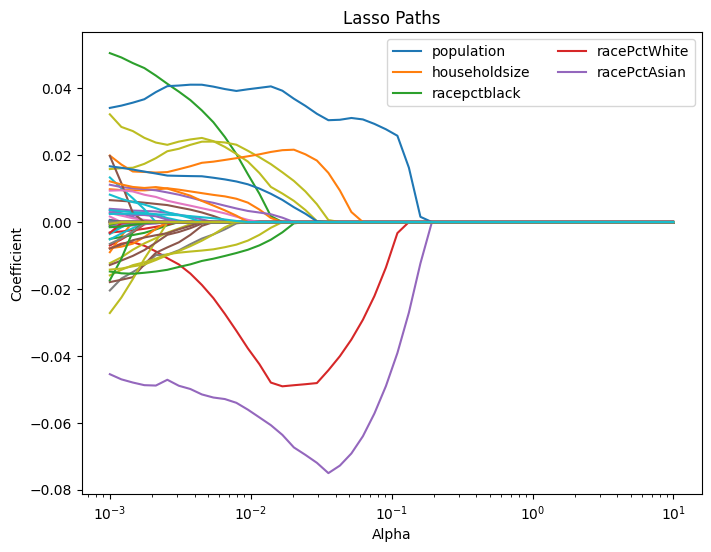

In [33]:
# Lasso Path Plot

import matplotlib.pyplot as plt

alphas_lasso, coefs_lasso, _ = lasso_path(
    X_train_scaled,
    y_train,
    alphas=np.logspace(-3,1,50)
)

plt.figure(figsize=(8,6))
for i in range(coefs_lasso.shape[0]):
    plt.plot(alphas_lasso, coefs_lasso[i,:], label=X_train.columns[i] if i<5 else None)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Lasso Paths')
plt.legend(loc='best', ncol=2)
plt.show()

In [34]:
# ElasticNetCV with Different l1_ratios

from sklearn.linear_model import ElasticNetCV, enet_path

for ratio in [0.3, 0.7]:
    enet_cv = ElasticNetCV(l1_ratio=ratio, cv=5, random_state=42)
    enet_cv.fit(X_train_scaled, y_train)
    print(f"\nElasticNet (l1_ratio={ratio}) -> best alpha: {enet_cv.alpha_:.4f}")

    enet_coefs = pd.Series(enet_cv.coef_, index=X_train.columns)
    top_enet = enet_coefs.abs().sort_values(ascending=False).head(10)
    print(f"Top 10 features by magnitude for l1_ratio={ratio}:")
    print(top_enet)


ElasticNet (l1_ratio=0.3) -> best alpha: 0.0016
Top 10 features by magnitude for l1_ratio=0.3:
racepctblack        0.050801
PctKids2Par         0.043069
PctPersDenseHous    0.042868
PctPopUnderPov      0.039939
MedRent             0.036264
agePct12t29         0.034161
PctIlleg            0.031192
RentLowQ            0.030496
HousVacant          0.025757
MalePctNevMarr      0.024781
dtype: float64

ElasticNet (l1_ratio=0.7) -> best alpha: 0.0007
Top 10 features by magnitude for l1_ratio=0.7:
racepctblack        0.051253
PctKids2Par         0.045662
PctPersDenseHous    0.043908
PctPopUnderPov      0.040771
MedRent             0.037284
agePct12t29         0.035025
RentLowQ            0.031156
PctIlleg            0.030996
HousVacant          0.026047
MalePctNevMarr      0.025279
dtype: float64


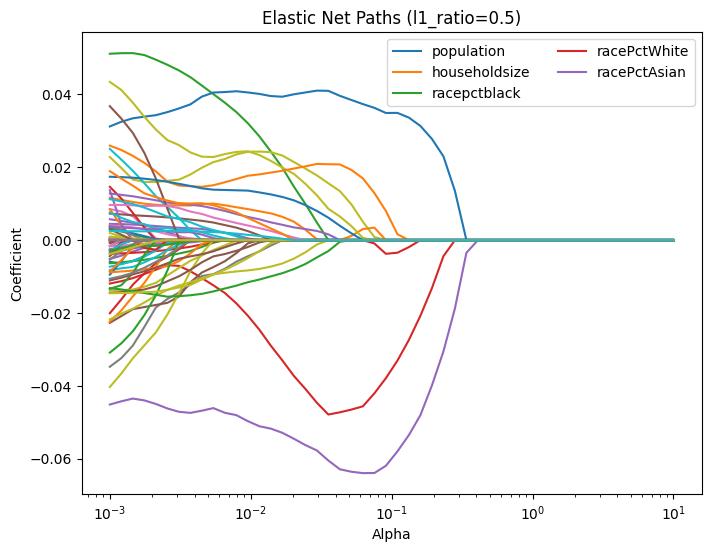

In [35]:
# Elastic Net Path (for a single l1_ratio)

l1_ratio_demo = 0.5
enet_alphas, enet_coefs, _ = enet_path(
    X_train_scaled,
    y_train,
    l1_ratio=l1_ratio_demo,
    alphas=np.logspace(-3,1,50)
)

plt.figure(figsize=(8,6))
for i in range(enet_coefs.shape[0]):
    plt.plot(enet_alphas, enet_coefs[i,:], label=X_train.columns[i] if i<5 else None)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title(f'Elastic Net Paths (l1_ratio={l1_ratio_demo})')
plt.legend(loc='best', ncol=2)
plt.show()

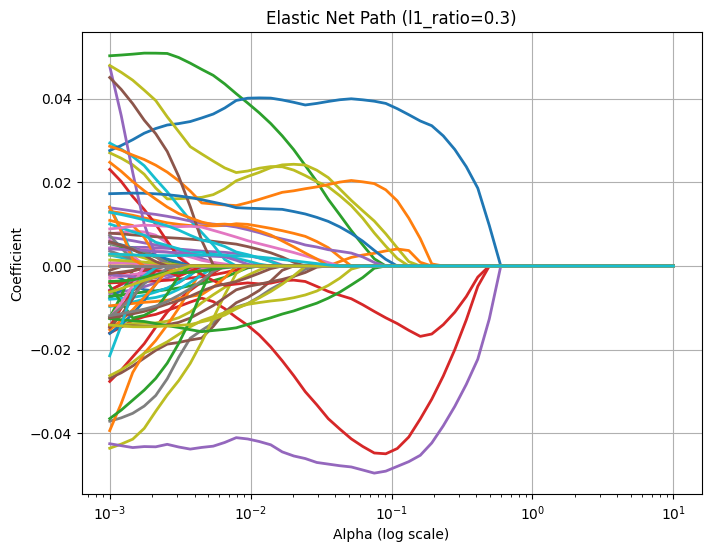

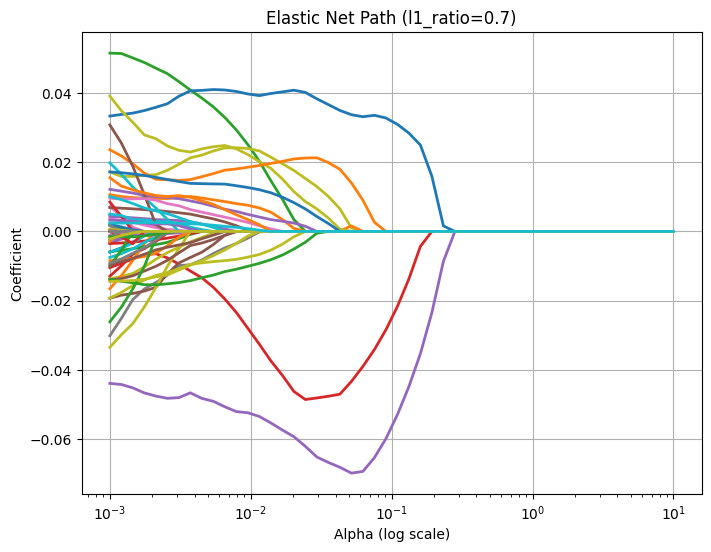

In [43]:
# Elastic Net path (at two separate α’s)

for ratio in [0.3, 0.7]:
    enet_alphas, enet_coefs, _ = enet_path(
        X_train_scaled, y_train,
        l1_ratio=ratio,
        alphas=np.logspace(-3, 1, 50)
    )

    plt.figure(figsize=(8, 6))
    for i in range(enet_coefs.shape[0]):
        plt.plot(enet_alphas, enet_coefs[i, :], lw=2)

    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Coefficient')
    plt.title(f'Elastic Net Path (l1_ratio={ratio})')
    plt.grid(True)
    plt.show()

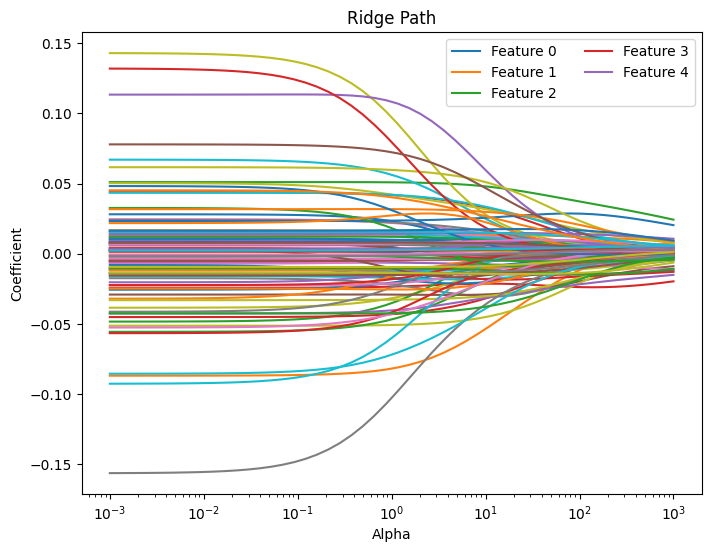

In [46]:
# Ridge path

from sklearn.linear_model import Ridge

alphas_ridge = np.logspace(-3, 3, 50)
coefs_ridge = []

for a in alphas_ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)  # or True
    ridge.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge).T

plt.figure(figsize=(8,6))
for i in range(coefs_ridge.shape[0]):
    plt.plot(alphas_ridge, coefs_ridge[i, :], label=f"Feature {i}" if i<5 else None)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge Path')
plt.legend(loc='best', ncol=2)
plt.show()


# 1.(a)(iii)

### Top features for each methods have some overlap and some are different. This is because each algorithm handles correlated predictors and regularization differently.

### All methods (except OLS) have hyperparameters that strongly influence feature selection

### In Best Subsets, max_features=5, Changing that would change the chosen subset

### In RFE, n_features_to_select=10, Different target numbers lead to different subsets

### In Lasso and Elastic Net, We used cross-validated to find the best regularization strength, and for Elastic Net, different ratios produced slightly different coefficients

### changing these hyperparameters does yield different top features, because the level of penalty or the size of the subset shifts which variables remain in the model

### racepctblack, PctKids2Par, PctPopUnderPov, PctPersDenseHous, HousVacant. these are consistently selected by all methods

### From the consistent results, variables relating to racial composition, poverty, family structure, and crowding/housing stand out as critically important. They recur regardless of whether we look at p-values, subsets, or shrinkage methods

In [58]:
# 1.(b)(i)

import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def run_experiment_once(random_state=0):
    # Split
    X_train_full, X_temp, y_train_full, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=random_state
    )
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_valid_scaled      = scaler.transform(X_valid)
    X_test_scaled       = scaler.transform(X_test)

    # OLS
    lr_ols = LinearRegression().fit(X_train_full_scaled, y_train_full)
    ols_test_mse = mean_squared_error(y_test, lr_ols.predict(X_test_scaled))

    # Ridge
    alphas_ridge = np.logspace(-3, 2, 10)
    best_alpha_ridge = None
    best_mse_ridge = float('inf')
    for a in alphas_ridge:
        ridge_tmp = Ridge(alpha=a)
        ridge_tmp.fit(X_train_full_scaled, y_train_full)
        val_mse = mean_squared_error(y_valid, ridge_tmp.predict(X_valid_scaled))
        if val_mse < best_mse_ridge:
            best_mse_ridge = val_mse
            best_alpha_ridge = a
    ridge_final = Ridge(alpha=best_alpha_ridge).fit(X_train_full_scaled, y_train_full)
    ridge_test_mse = mean_squared_error(y_test, ridge_final.predict(X_test_scaled))

    # Filter to top 15 correlated for
    X_train_num = X_train_full.select_dtypes(include=[np.number])
    corrs = []
    for c in X_train_num.columns:
        corr_val = np.corrcoef(X_train_num[c], y_train_full)[0,1]
        corrs.append((c,corr_val))
    corr_df = pd.DataFrame(corrs, columns=["feature","corr"])
    corr_df["abs_corr"] = corr_df["corr"].abs()
    corr_df.sort_values("abs_corr", ascending=False, inplace=True)

    top_15_feats = corr_df.head(15)["feature"].tolist()

    X_train_filt = X_train_num[top_15_feats]
    X_valid_filt = X_valid[top_15_feats]
    X_test_filt  = X_test[top_15_feats]

    scaler_sub = StandardScaler()
    X_train_filt_scaled = scaler_sub.fit_transform(X_train_filt)
    X_valid_filt_scaled = scaler_sub.transform(X_valid_filt)
    X_test_filt_scaled  = scaler_sub.transform(X_test_filt)

    # Best Subsets
    best_mse_bsub = float('inf')
    best_model_bsub = None
    best_idx_bsub   = None
    for max_f in [3,4,5]:
        efs = EFS(
            estimator=LinearRegression(),
            min_features=1,
            max_features=max_f,
            scoring='neg_mean_squared_error',
            cv=5,
            n_jobs=-1
        )
        efs.fit(X_train_filt_scaled, y_train_full)
        idx = efs.best_idx_
        tmp_model = LinearRegression().fit(X_train_filt_scaled[:,idx], y_train_full)
        val_mse = mean_squared_error(
            y_valid,
            tmp_model.predict(X_valid_filt_scaled[:,idx])
        )
        if val_mse < best_mse_bsub:
            best_mse_bsub = val_mse
            best_model_bsub = tmp_model
            best_idx_bsub   = idx

    bsub_test_mse = mean_squared_error(
        y_test,
        best_model_bsub.predict(X_test_filt_scaled[:,best_idx_bsub])
    )

    # Stepwise (Forward)
    best_mse_sfs = float('inf')
    best_model_sfs = None
    best_idx_sfs   = None
    for kf in [3,4,5,6]:
        sfs_f = SFS(
            LinearRegression(),
            k_features=kf,
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=5,
            n_jobs=-1
        )
        sfs_f.fit(X_train_filt_scaled, y_train_full)
        idx_sfs = list(sfs_f.k_feature_idx_)
        tmp_model = LinearRegression().fit(X_train_filt_scaled[:,idx_sfs], y_train_full)
        val_mse = mean_squared_error(
            y_valid,
            tmp_model.predict(X_valid_filt_scaled[:,idx_sfs])
        )
        if val_mse < best_mse_sfs:
            best_mse_sfs = val_mse
            best_model_sfs = tmp_model
            best_idx_sfs   = idx_sfs
    sfs_test_mse = mean_squared_error(
        y_test,
        best_model_sfs.predict(X_test_filt_scaled[:,best_idx_sfs])
    )

    # Lasso
    from sklearn.linear_model import Lasso
    alphas_lasso = np.logspace(-4,1,10)
    best_alpha_lasso = None
    best_mse_lasso = float('inf')
    for a in alphas_lasso:
        lasso_tmp = Lasso(alpha=a, max_iter=10000)
        lasso_tmp.fit(X_train_full_scaled, y_train_full)
        val_mse = mean_squared_error(y_valid, lasso_tmp.predict(X_valid_scaled))
        if val_mse < best_mse_lasso:
            best_mse_lasso = val_mse
            best_alpha_lasso = a
    lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000).fit(X_train_full_scaled, y_train_full)
    lasso_test_mse = mean_squared_error(y_test, lasso_final.predict(X_test_scaled))

    # Elastic Net
    from sklearn.linear_model import ElasticNet
    alphas_enet = np.logspace(-4,1,5)
    l1_ratios   = [0.2,0.5,0.8]
    best_mse_enet = float('inf')
    best_a_enet = None
    best_l1_enet = None
    for a in alphas_enet:
        for l1 in l1_ratios:
            enet_tmp = ElasticNet(alpha=a, l1_ratio=l1, max_iter=10000)
            enet_tmp.fit(X_train_full_scaled, y_train_full)
            val_mse = mean_squared_error(y_valid, enet_tmp.predict(X_valid_scaled))
            if val_mse < best_mse_enet:
                best_mse_enet = val_mse
                best_a_enet   = a
                best_l1_enet  = l1
    enet_final = ElasticNet(alpha=best_a_enet, l1_ratio=best_l1_enet, max_iter=10000)
    enet_final.fit(X_train_full_scaled, y_train_full)
    enet_test_mse = mean_squared_error(y_test, enet_final.predict(X_test_scaled))

    return {
        "OLS": ols_test_mse,
        "Ridge": ridge_test_mse,
        "BestSubsets": bsub_test_mse,
        "Stepwise": sfs_test_mse,
        "Lasso": lasso_test_mse,
        "ElasticNet": enet_test_mse
    }


In [56]:
# compare the average prediction MSE
def run_experiment(n_runs=10):
    np.random.seed(0)
    methods = ["OLS","Ridge","BestSubsets","Stepwise","Lasso","ElasticNet"]
    all_res = {m: [] for m in methods}

    for i in range(n_runs):
        res_i = run_experiment_once(random_state=i)
        for m in methods:
            all_res[m].append(res_i[m])

    avg_res = {}
    for m in methods:
        avg_res[m] = np.mean(all_res[m])
    return avg_res, all_res

avg_results, all_results_detail = run_experiment(n_runs=10)

print("Average Test MSE over 10 runs:")
for method, val in avg_results.items():
    print(f"{method}: {val:.4f}")

Features: 4943/4943

Average Test MSE over 10 runs:
OLS: 0.0200
Ridge: 0.0196
BestSubsets: 0.0216
Stepwise: 0.0216
Lasso: 0.0196
ElasticNet: 0.0196


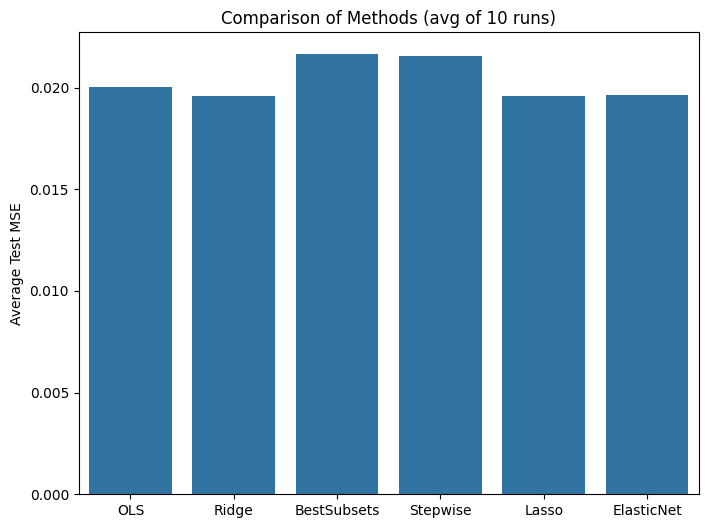

In [59]:
# 1.(b)(ii) visualize the results

plt.figure(figsize=(8,6))
methods = list(avg_results.keys())
avg_mses = list(avg_results.values())
sns.barplot(x=methods, y=avg_mses)
plt.ylabel("Average Test MSE")
plt.title("Comparison of Methods (avg of 10 runs)")
plt.show()

# 1.(b)(iii)

### Ridge, Lasso, and Elastic Net have the lowest MSE(0.0196), so they produce the best predictive performance on average

### These three methods shrink coefficients, handling multicollinearity and reducing the variance of predictions. They prevent overfitting in a dataset with many correlated features

### Best Subsets, Stepwise have higher test MSE(0.0216), this suggests that they may be overfitting the training data.

### Ridge distributes non-zero weights across correlated features (L2 penalty). Lasso zeroes out many coefficients (L1 penalty). Elastic Net is a mixture of both. The specific variables each method emphasizes can be different, even though their predictions are the same.

### Elastic Net is the best model because it balences both ridge and lasso methods, which they all the the same average MSE